generation size:  24


<IPython.core.display.Javascript object>


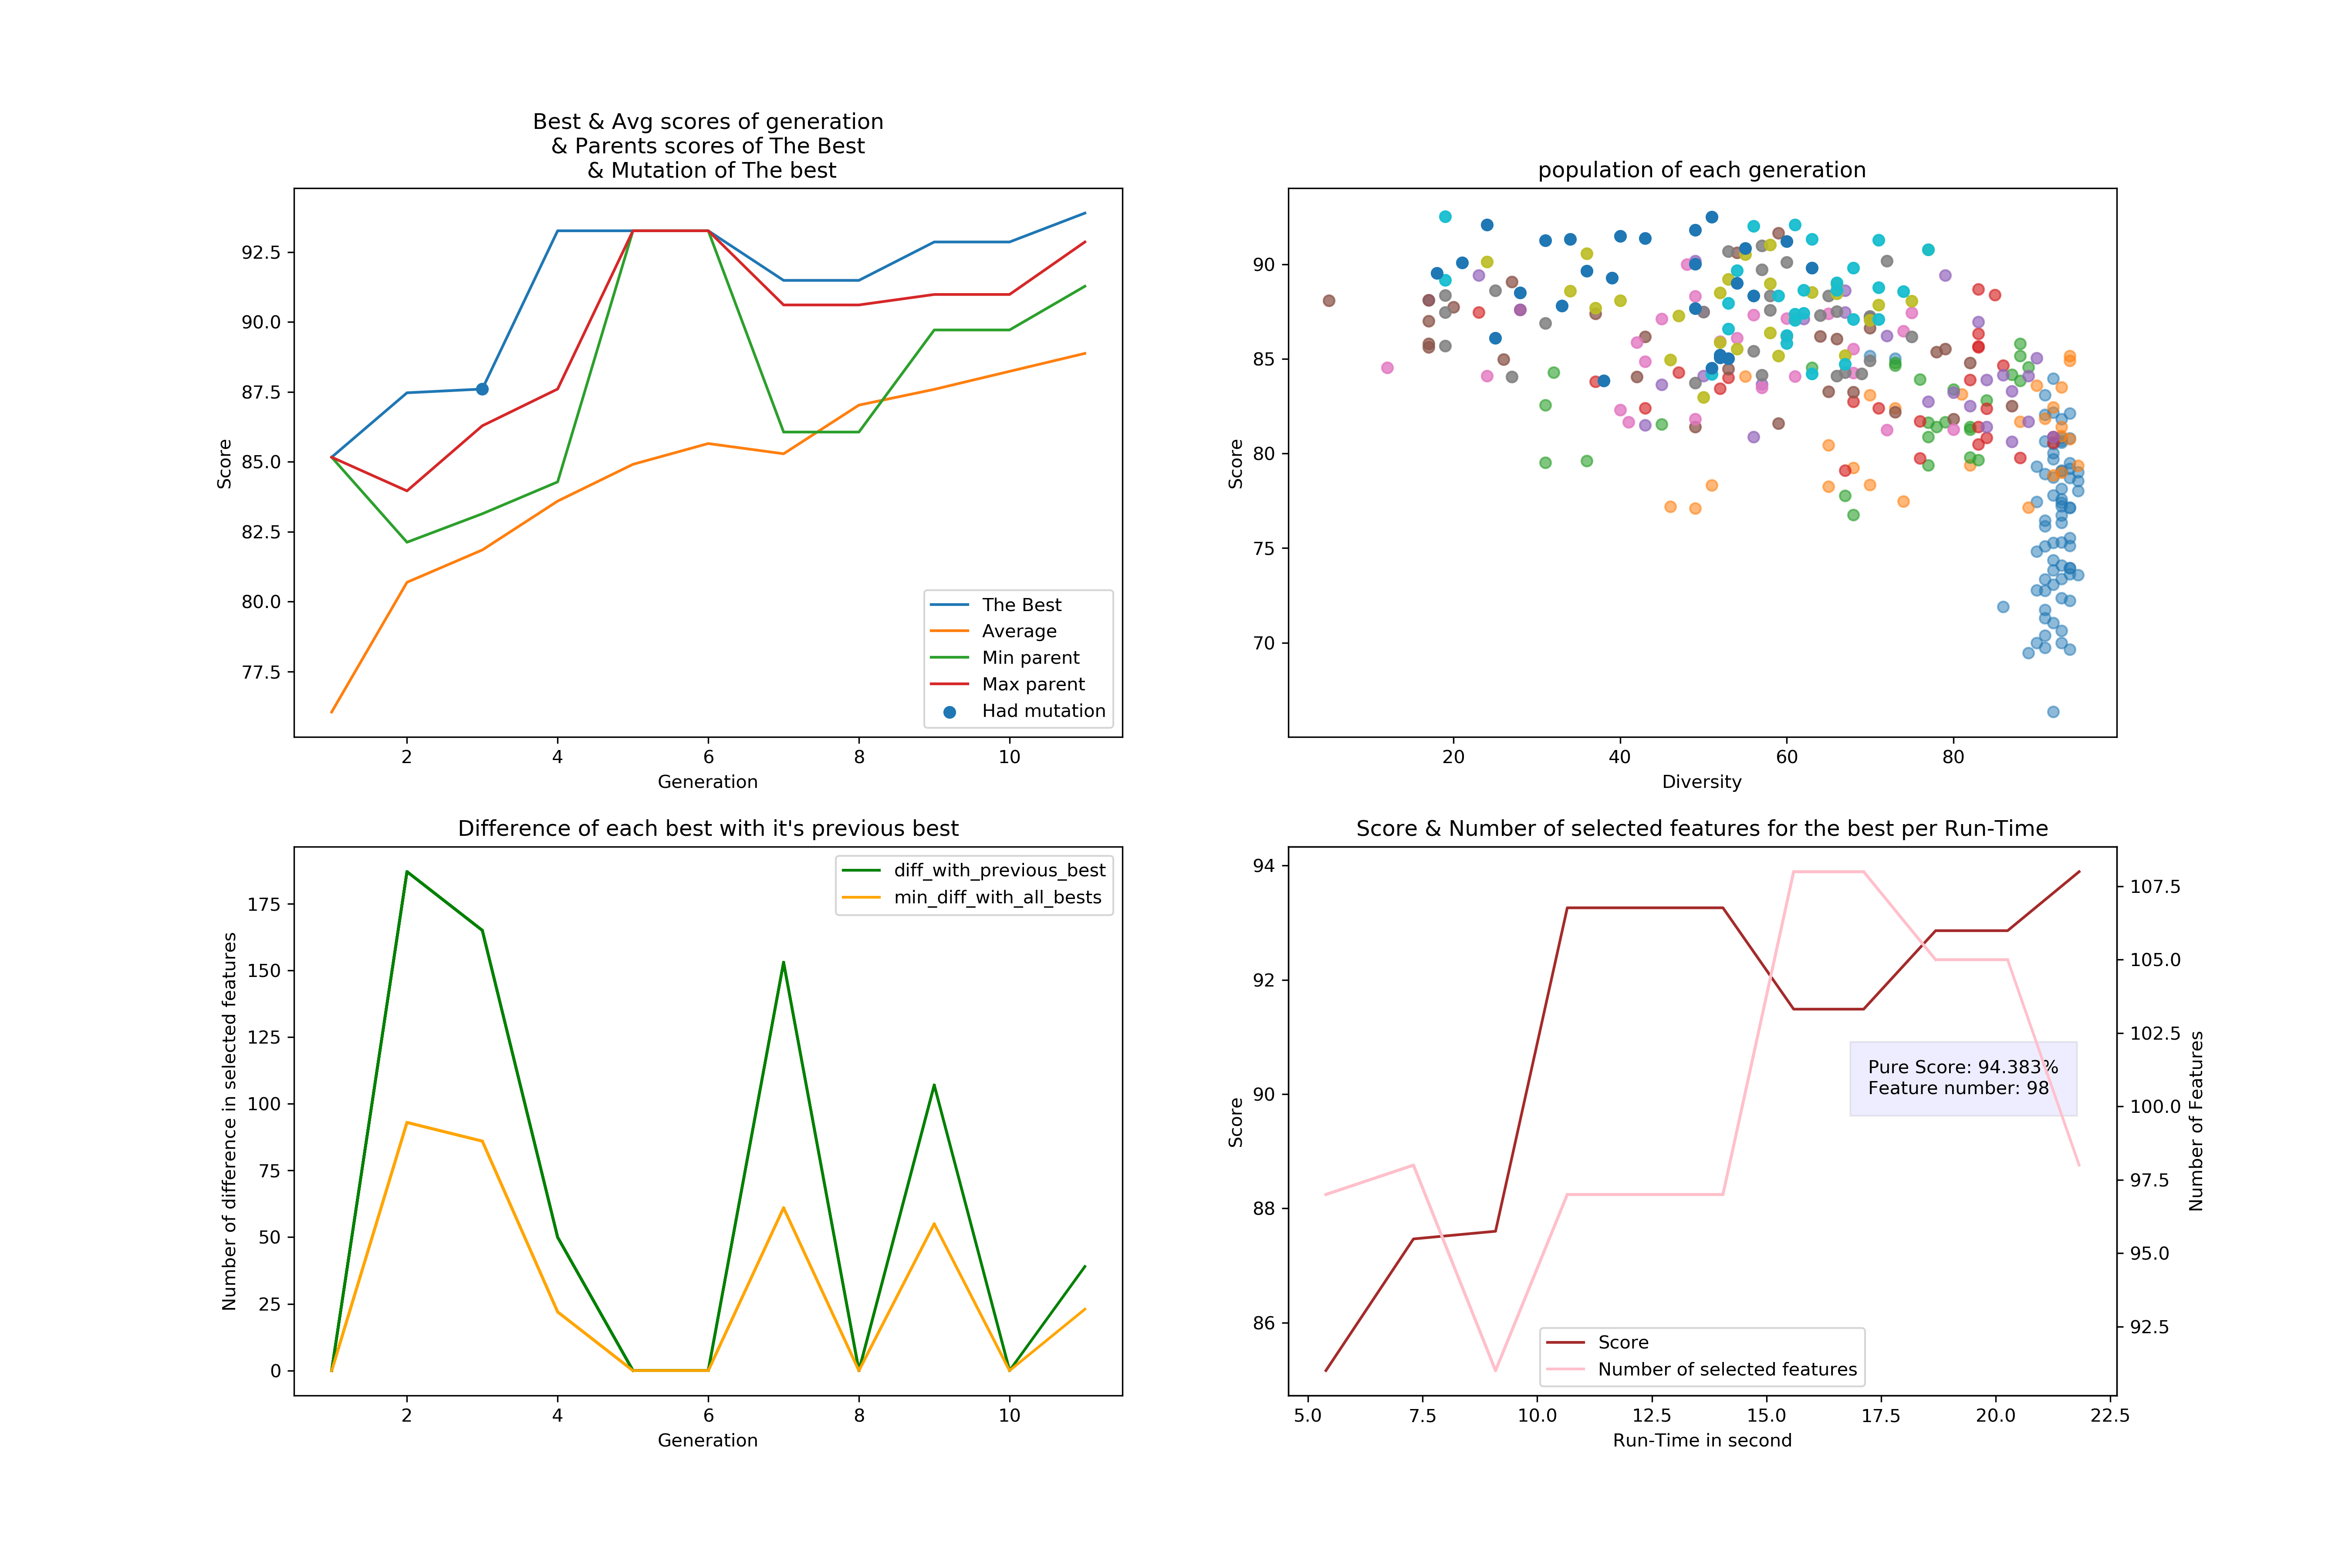

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 12 19:59:10 2020

@author: Parviz.Asoodehfard
"""
import sys
sys.path.append('../src/')


import pandas as pd
from module import gafs
from sklearn.linear_model import LogisticRegression


X = pd.read_csv(r'../data/data_modified.csv',header=None,prefix='c')
y = pd.read_csv(r'../data/labels_modified.csv',header=None)
y.columns=['CANCER_TYPE']
y_d = pd.get_dummies(y, columns=['CANCER_TYPE'])

%matplotlib notebook

best_cols={}
features = X.columns
sel = gafs.GeneticSelector(estimator= LogisticRegression(),#SVC(kernel='linear', C=0.00005), 
                        n_gen=5, 
                        n_best=2, # small number will not coverge, big number respect to n_rand will stick in local optimum
                        n_rand=10, # small number stick in local optimum,   big number has time cost
                        n_children=2, # big number stick in local optimum,    small number will not converge
                        n_die=2,
                        prc_features_rand_init=.95,
                        initial_size_ratio=10,
                        initial_rate_search_score=3,
                        mutation_rate=0.2,
                        scoring="f1",
                        mutate_rate_micro=0.001,
                        l1=0.005,
                        previous_result=None,
                        n_jobs=-1,
                        max_iterate=10,                    
                        f_diverse=True,                    
                        f_periority_in_crossover=False,     
                        f_extra_best_previous=False,        
                        f_extra_bests_previous=False,      
                        f_extra_mutate=False,              
                        f_extra_crossover_with_minimal=False,
                        f_rfecv=True,
                        f_dynamic_child=True)
sel.fit(X, y_d['CANCER_TYPE_0'])                     
